# MOwNiT – Układy równań liniowych - metody bezpośrednie

__Przygotował:__
__Szymon Budziak__

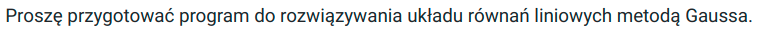

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

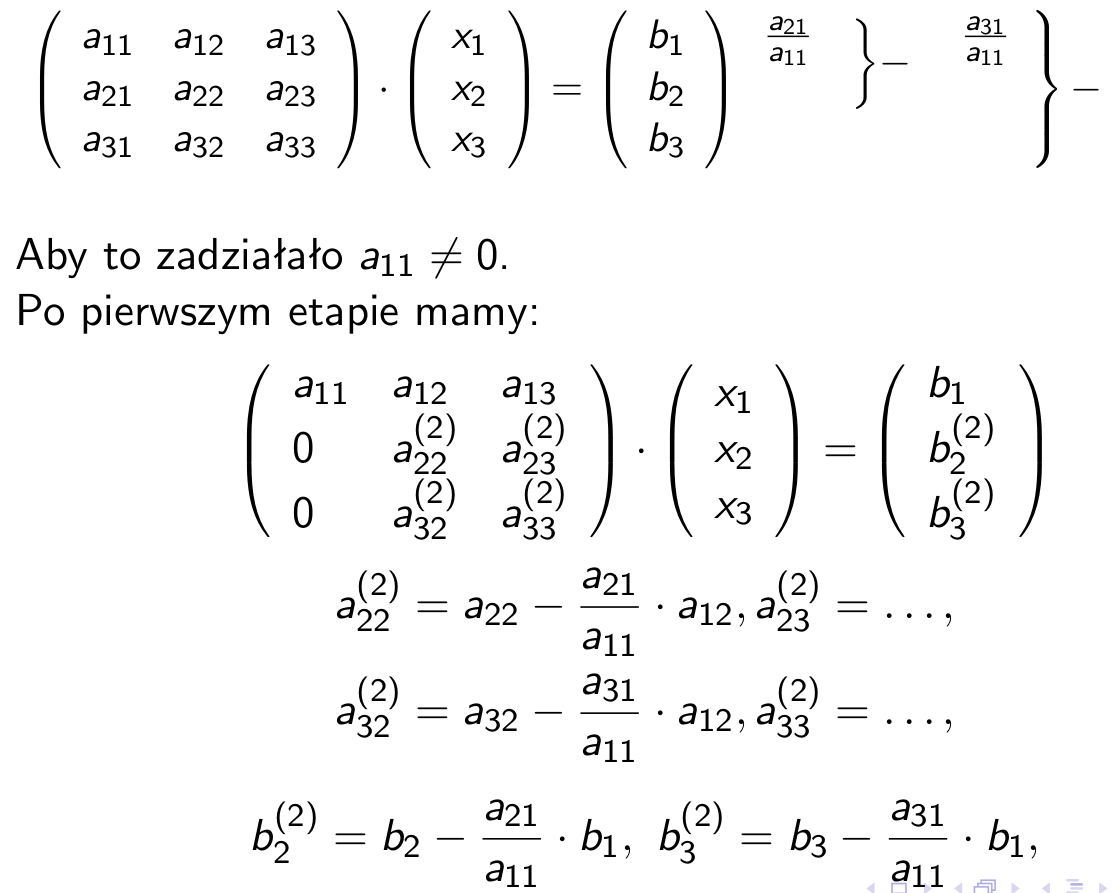

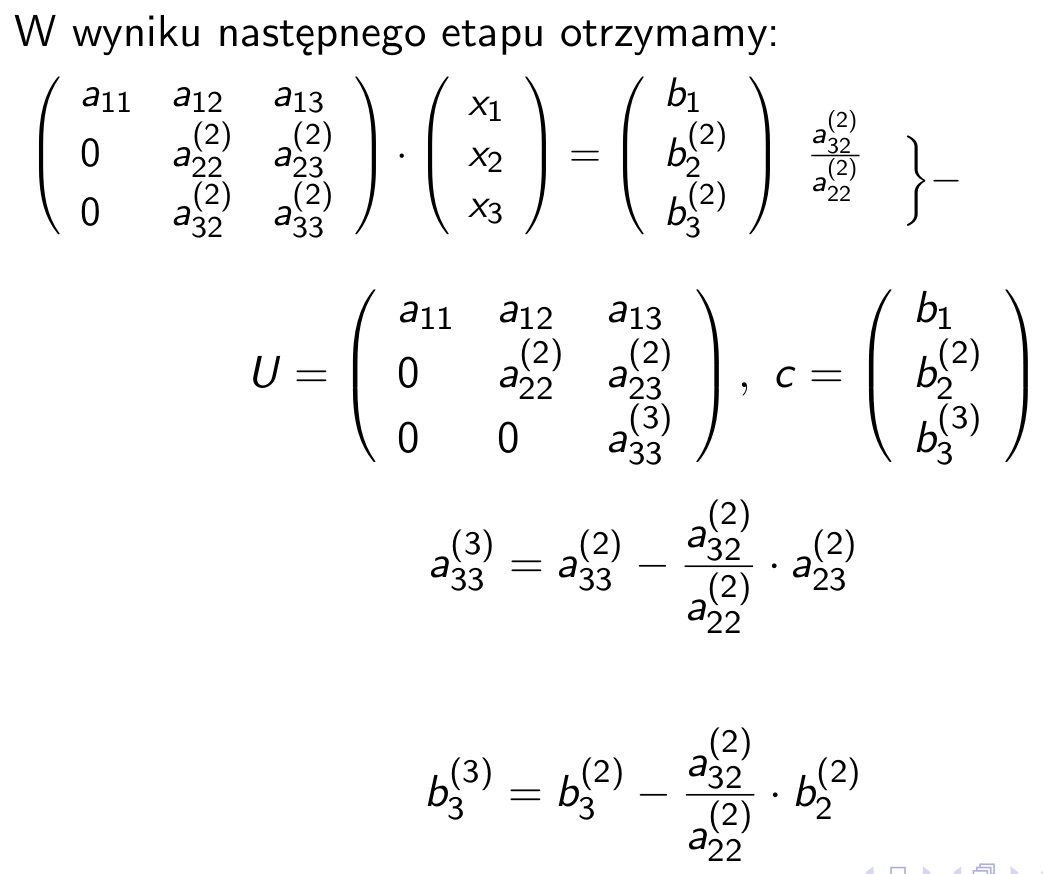

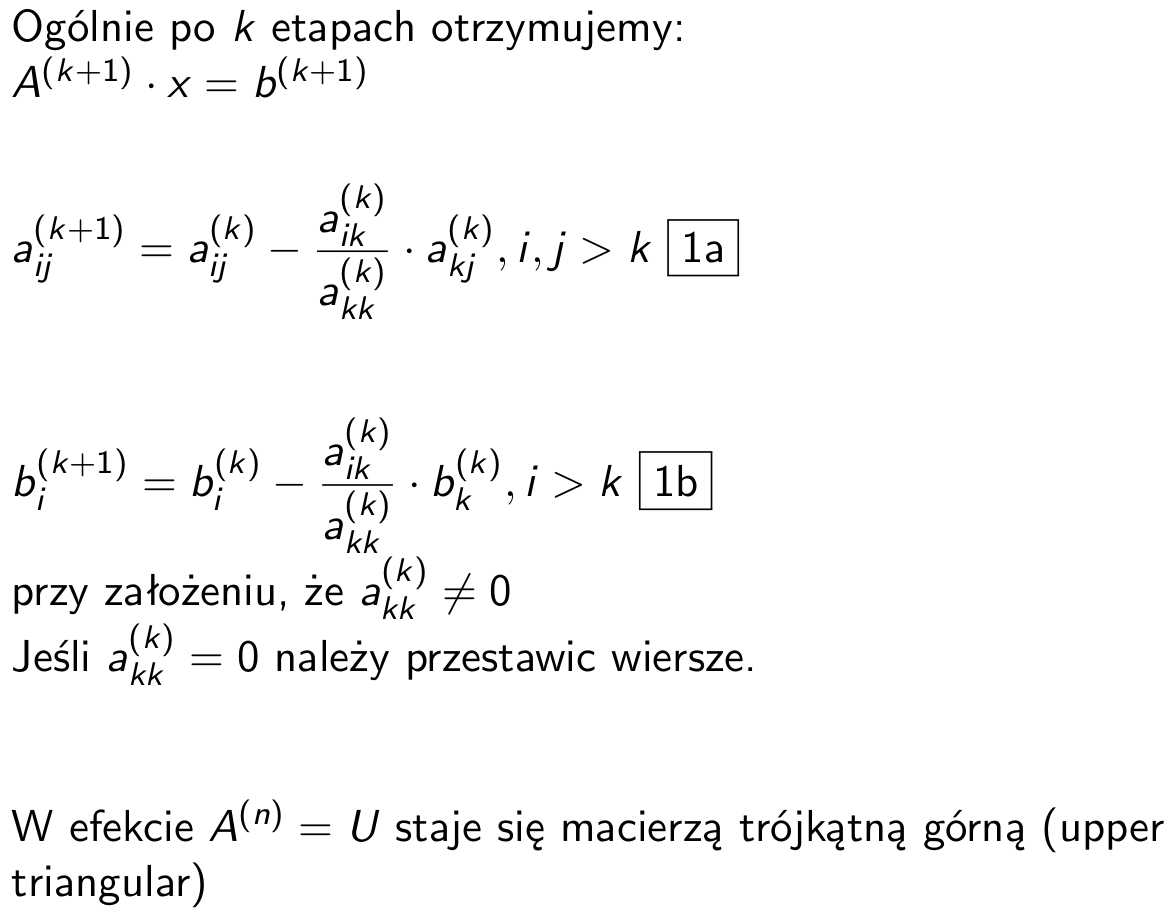

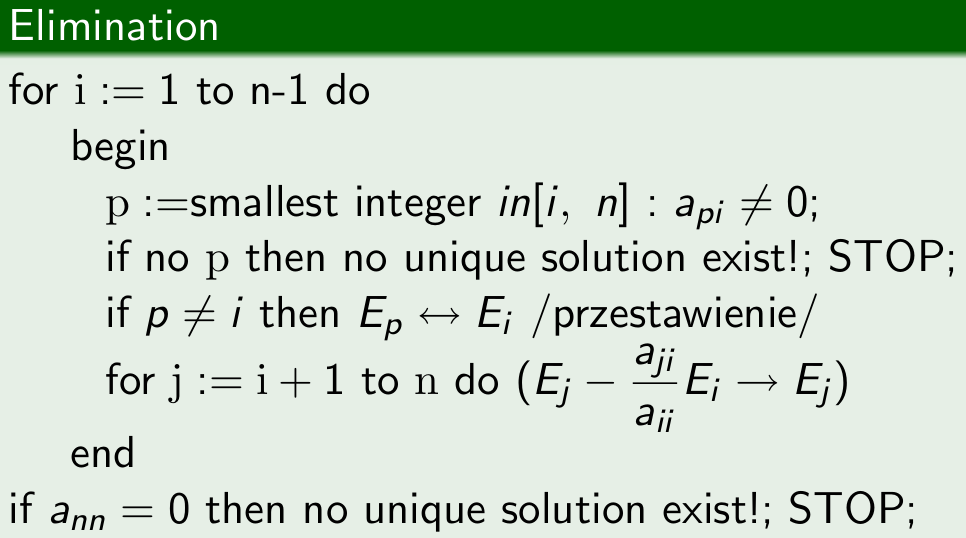

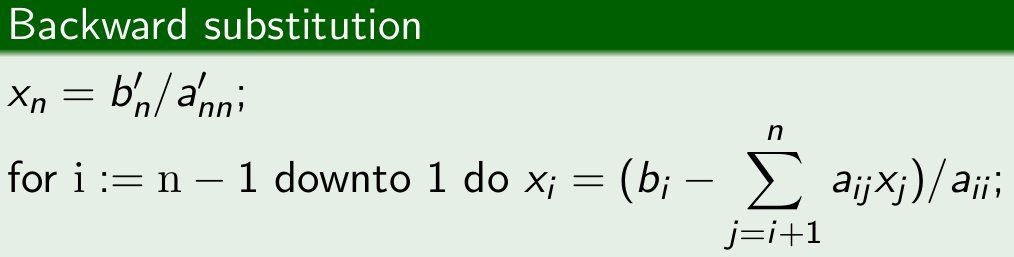

In [2]:
def gaussian_elimination(A, B):
    n = np.shape(A)[0]
    C = np.hstack([A, B.reshape((n, 1))]).astype(np.float64)

    for i in range(n):
        for j in range(i + 1, n):
            ratio = C[j][i] / C[i][i]
            C[j] = C[j] - ratio * C[i]

    X = C[:, n]
    X[n - 1] /= C[n - 1][n - 1]
    for i in range(n - 2, -1, -1):
        X[i] -= np.sum(C[i][i + 1:n] * X[i + 1:n])
        X[i] /= C[i][i]
    return X

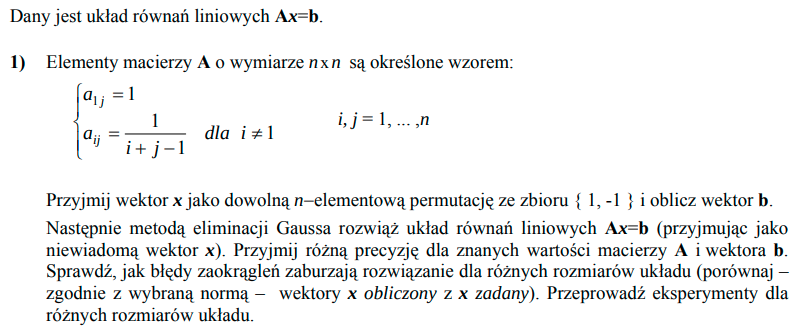

In [3]:
def exercise_1(numbers):
    result = []
    for n in numbers:
        for float_type in [np.float32, np.float64, np.float128]:
            A = np.array([[1 / (i + j - 1) if i != 1 else 1 for j in range(1, n + 1)] for i in range(1, n + 1)]).astype(float_type)
            X_vec = np.array([1 if i % 2 == 0 else -1 for i in range(n)])
            B = A @ X_vec
            X = gaussian_elimination(A, B)
            norm = np.linalg.norm(X_vec - X)
            result += [norm]
    df = pd.DataFrame(data={"n": numbers,
                            "float32": result[::3],
                            "float64": result[1::3],
                            "float128": result[2::3]})
    return df

In [4]:
numbers = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 50, 70, 100, 150, 200, 300, 500]
df_1 = exercise_1(numbers)
df_1

,n,float32,float64,float128
0,3,0.000000e+00,0.000000e+00,0.000000e+00
1,4,6.646519e-15,3.018715e-13,0.000000e+00
2,5,7.282637e-13,9.229383e-12,4.068508e-12
3,6,5.440998e-11,3.637978e-10,1.085912e-11
4,7,3.695169e-09,1.360925e-08,1.808627e-09
5,8,6.747595e-09,1.203346e-07,6.036745e-09
6,9,4.038060e-08,5.400507e-07,1.625914e-06
7,10,6.730517e-09,1.662034e-04,2.235847e-05
8,11,8.556779e-09,1.223408e-02,1.518982e-03
9,12,1.100517e-08,1.213976e+00,5.231688e-02


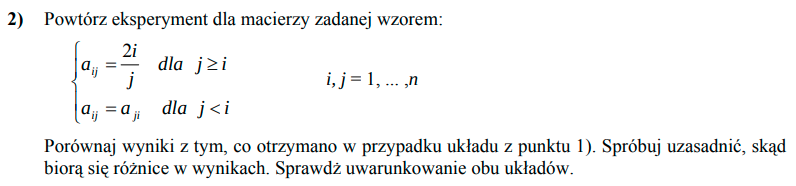

In [5]:
def exercise_2(numbers):
    result = []
    for n in numbers:
        for float_type in [np.float32, np.float64, np.float128]:
            A = np.zeros((n, n)).astype(float_type)
            for i in range(1, n + 1):
                for j in range(1, n + 1):
                    if j >= i:
                        A[i - 1][j - 1] = 2 * i / j
                    else:
                        A[i - 1][j - 1] = A[j - 1][i - 1]
            X_vec = np.array([1 if i % 2 == 0 else -1 for i in range(n)])
            B = A @ X_vec
            X = gaussian_elimination(A, B)
            norm = np.linalg.norm(X_vec - X)
            result += [norm]
    df = pd.DataFrame(data={"n": numbers,
                            "float32": result[::3],
                            "float64": result[1::3],
                            "float128": result[2::3]})
    return df

In [6]:
numbers = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 50, 70, 100, 150, 200, 300, 500]
df_2 = exercise_2(numbers)
df_2

,n,float32,float64,float128
0,3,0.000000e+00,3.140185e-16,3.140185e-16
1,4,0.000000e+00,2.482534e-16,5.661049e-16
2,5,2.482534e-16,4.154074e-16,4.965068e-16
3,6,3.140185e-16,9.742168e-16,6.473657e-16
4,7,2.482534e-16,1.694682e-15,7.771561e-16
5,8,6.080942e-16,4.672179e-15,2.294162e-15
6,9,1.481222e-15,3.310252e-15,1.426107e-15
7,10,2.991428e-15,3.082744e-15,5.304729e-15
8,11,2.983176e-15,4.421421e-15,6.666887e-15
9,12,3.638416e-15,1.980403e-14,1.083534e-14


In [7]:
def compare(df_1, df_2):
    df = pd.DataFrame(data={"n": df_1["n"],
                            "ex 1 float32": df_1["float32"],
                            "ex 2 float32": df_2["float32"],
                            "ex 1 float64": df_1["float64"],
                            "ex 2 float64": df_2["float64"],
                            "ex 1 float128": df_1["float128"],
                            "ex 2 float128": df_2["float128"]})
    return df

In [8]:
compare_df = compare(df_1, df_2)
compare_df

,n,ex 1 float32,ex 2 float32,ex 1 float64,ex 2 float64,ex 1 float128,ex 2 float128
0,3,0.000000e+00,0.000000e+00,0.000000e+00,3.140185e-16,0.000000e+00,3.140185e-16
1,4,6.646519e-15,0.000000e+00,3.018715e-13,2.482534e-16,0.000000e+00,5.661049e-16
2,5,7.282637e-13,2.482534e-16,9.229383e-12,4.154074e-16,4.068508e-12,4.965068e-16
3,6,5.440998e-11,3.140185e-16,3.637978e-10,9.742168e-16,1.085912e-11,6.473657e-16
4,7,3.695169e-09,2.482534e-16,1.360925e-08,1.694682e-15,1.808627e-09,7.771561e-16
5,8,6.747595e-09,6.080942e-16,1.203346e-07,4.672179e-15,6.036745e-09,2.294162e-15
6,9,4.038060e-08,1.481222e-15,5.400507e-07,3.310252e-15,1.625914e-06,1.426107e-15
7,10,6.730517e-09,2.991428e-15,1.662034e-04,3.082744e-15,2.235847e-05,5.304729e-15
8,11,8.556779e-09,2.983176e-15,1.223408e-02,4.421421e-15,1.518982e-03,6.666887e-15
9,12,1.100517e-08,3.638416e-15,1.213976e+00,1.980403e-14,5.231688e-02,1.083534e-14


In [9]:
def norm(A):
    n = len(A)
    return max(sum(A[i][j] for j in range(n)) for i in range(n))

In [10]:
def create_A1(n):
    return np.array([[1 / (i + j - 1) if i != 1 else 1 for j in range(1, n + 1)] for i in range(1, n + 1)])

In [11]:
def create_A2(n):
    A = np.zeros((n, n))
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            if j >= i:
                A[i - 1][j - 1] = 2 * i / j
            else:
                A[i - 1][j - 1] = A[j - 1][i - 1]
    return A

In [12]:
def conditioning_factor(A):
    A_inv = np.linalg.inv(A)
    return norm(A_inv) * norm(A)

In [13]:
def condition_number(numbers):
    result = []
    for n in numbers:
        con_num_1 = conditioning_factor(create_A1(n))
        con_num_2 = conditioning_factor(create_A2(n))
        result += [con_num_1, con_num_2]
    df = pd.DataFrame(data={"n":numbers,
                            "ex 1 condition number":result[::2],
                            "ex 2 condition number":result[1::2]})
    return df

In [14]:
numbers = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 50, 70, 100, 150, 200, 300, 500]
condition_df = condition_number(numbers)
condition_df

,n,ex 1 condition number,ex 2 condition number
0,3,2.160000e+02,1.444444
1,4,2.880000e+03,1.833333
2,5,2.800000e+04,2.233333
3,6,2.268000e+05,2.644444
4,7,1.629936e+06,3.031746
5,8,1.286208e+07,3.448413
6,9,1.120002e+08,3.849206
7,10,8.841438e+08,4.249206
8,11,6.473792e+09,4.659428
9,12,4.407939e+10,5.055219


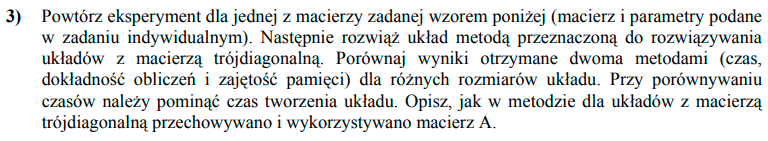

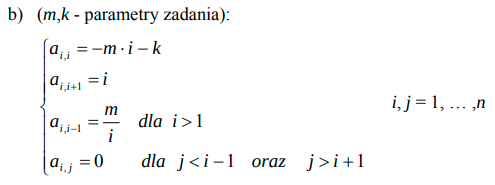

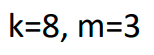

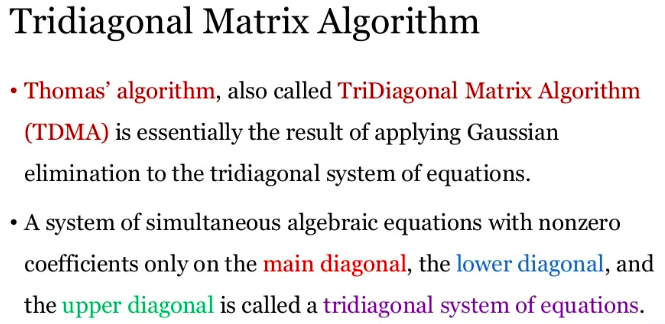

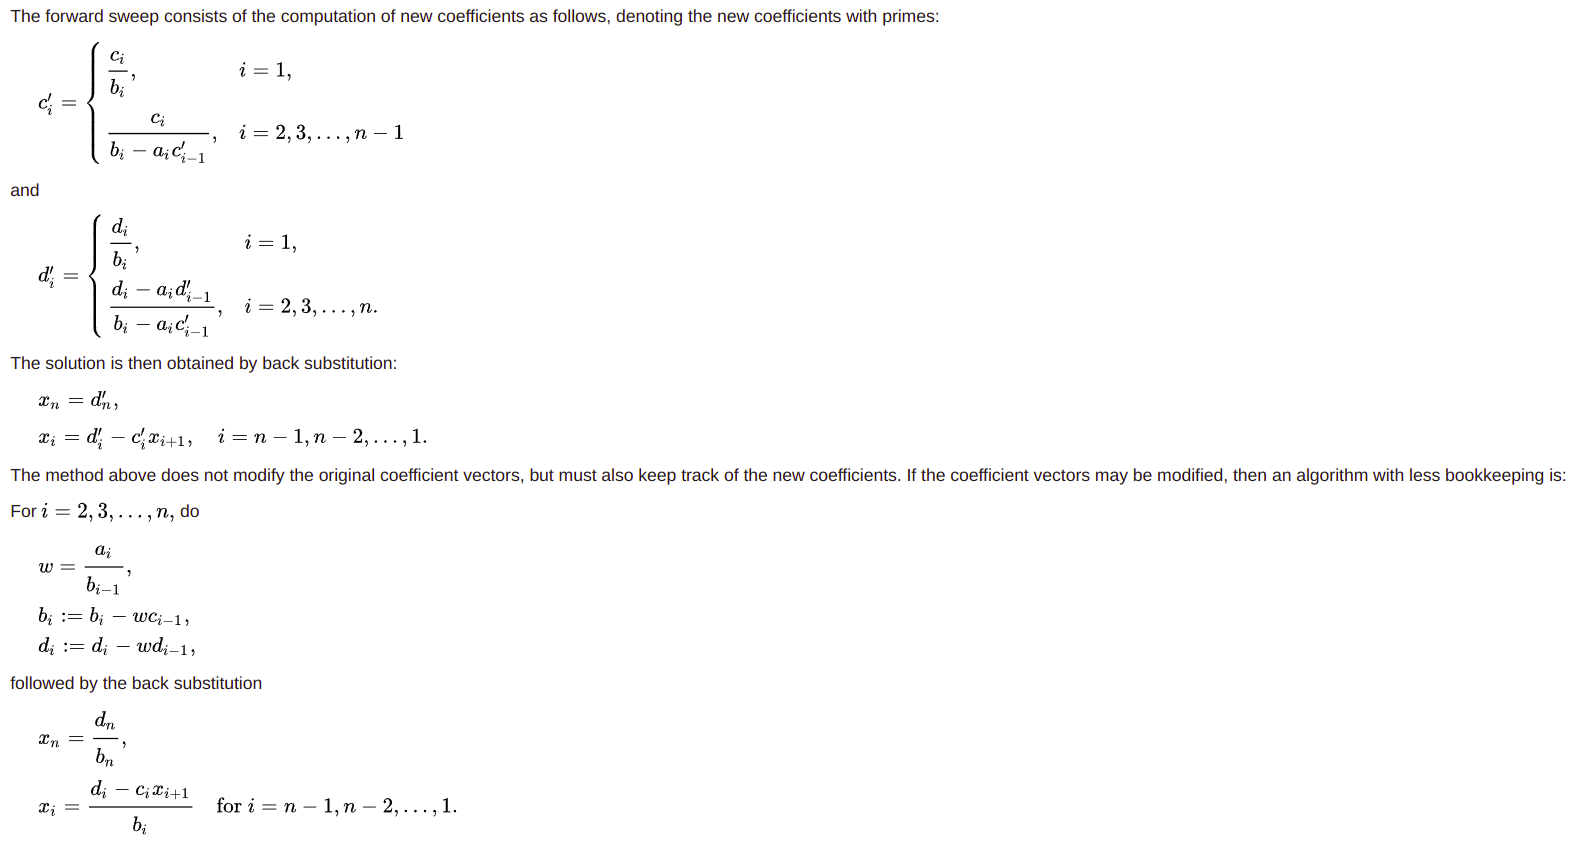

In [15]:
from time import perf_counter

In [16]:
def thomas_algorithm(A, B):
    n = np.shape(A)[0]
    C = np.zeros(n)
    C[0] = A[0][0]

    X = np.zeros(n)
    X[0] = B[0]

    for i in range(1, n):
        ratio = A[i][i - 1] / C[i - 1]
        C[i] = A[i][i] - ratio * A[i - 1][i]
        X[i] = B[i] - ratio * X[i - 1]

    X[n - 1] = X[n - 1] / C[n - 1]
    for i in range(n - 2, -1, -1):
        X[i] = (X[i] - A[i][i + 1] * X[i + 1]) / C[i]
    return X

In [17]:
def exercise_3(numbers, k, m):
    result = []
    for n in numbers:
        A = np.zeros((n, n))
        for i in range(1, n + 1):
            for j in range(1, n + 1):
                if i == j:
                    A[i - 1][j - 1] = -m * i - k
                elif j == i + 1:
                    A[i - 1][j - 1] = i
                elif i > j == i - 1:
                    A[i - 1][j - 1] = m / i
        X_vec = np.array([1 if i % 2 == 0 else -1 for i in range(n)])
        B = A @ X_vec
        gaussian_start = perf_counter()
        X_gaussian = gaussian_elimination(A, B)
        gaussian_end = perf_counter()
        gaussian_time = gaussian_end - gaussian_start
        norm_gaussian = np.linalg.norm(X_vec - X_gaussian)

        thomas_start = perf_counter()
        X_thomas = thomas_algorithm(A, B)
        thomas_end = perf_counter()
        thomas_time = thomas_end - thomas_start
        norm_thomas = np.linalg.norm(X_vec - X_thomas)
        result += [norm_gaussian, norm_thomas, gaussian_time, thomas_time]
    df = pd.DataFrame(data={"n": numbers,
                            "gaussian norm": result[::4],
                            "thomas norm": result[1::4],
                            "gaussian time [s]": result[2::4],
                            "thomas time [s]": result[3::4]})
    return df

In [18]:
numbers = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 50, 70, 100, 150, 200, 300, 500]
df_3 = exercise_3(numbers, 8, 3)
df_3

,n,gaussian norm,thomas norm,gaussian time [s],thomas time [s]
0,3,2.220446e-16,2.220446e-16,0.000097,0.000013
1,4,2.220446e-16,2.220446e-16,0.000081,0.000013
2,5,2.220446e-16,2.220446e-16,0.000133,0.000014
3,6,2.220446e-16,2.220446e-16,0.000132,0.000016
4,7,2.482534e-16,2.482534e-16,0.000164,0.000017
5,8,2.220446e-16,2.220446e-16,0.000205,0.000019
6,9,2.220446e-16,2.220446e-16,0.000249,0.000021
7,10,2.220446e-16,2.220446e-16,0.000298,0.000023
8,11,2.220446e-16,2.220446e-16,0.000353,0.000025
9,12,2.220446e-16,2.220446e-16,0.000414,0.000027
